# Fisher LDA projection of vowel data to 2d

Author:Srikar-Reddy-Jilugu(@always-newbie161)  
https://github.com/probml/pmtk3/blob/master/demos/fisherDiscrimVowelDemo.m

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from scipy.io import loadmat

# import io, requests
# url = "https://github.com/probml/probml-data/blob/main/data/vowelTrain.mat?raw=true"
# r = requests.get(url, allow_redirects=True)
# rawdata = io.BytesIO(r.content)
rawdata = 'vowelTrain.mat'

data = loadmat(rawdata)
X = data['Xtrain'] # shape (528, 10)
y = data['ytrain'].squeeze() # shape (528,)

nsamples, ndims = X.shape
classes = np.unique(y)
nclasses = len(classes)

muC = np.stack([X[y == c].mean(axis=0) for c in classes], axis=0) # shape (11, 10)
K = 2
nsamples, ndims, nclasses

(528, 10, 11)

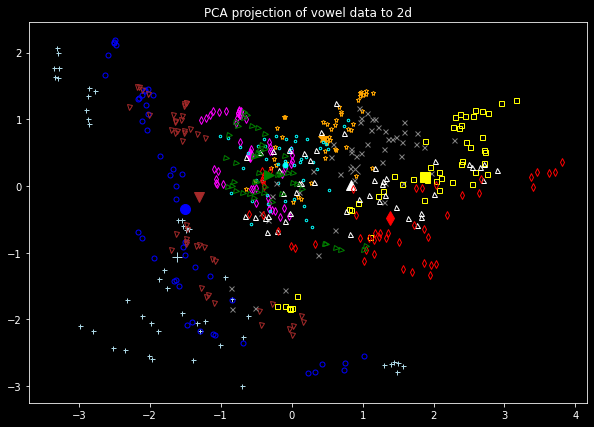

In [5]:
# PCA projection
from sklearn.decomposition import PCA
pca = PCA(n_components=K)
X_pca = pca.fit_transform(X, y)
X_pca[:,1] *= -1 # make it look like the Hastie figure
muC2d_pca = pca.transform(muC)
muC2d_pca[:,1] *= -1 # make it look like the Hastie figure

colors = ['lightblue', 'blue', 'brown', 'magenta', 'orange', 'cyan', 'gray', 'yellow', 'white', 'red', 'green']
symbols = "+ovd*.xs^d><ph"

_, ax = plt.subplots(figsize=(10,7))
for c in range(nclasses):
    ndx = np.where(y == (c + 1))
    ax.plot(X_pca[ndx, 0], X_pca[ndx, 1], symbols[c], color=colors[c], markersize=5, fillstyle='none')
    ax.plot(muC2d_pca[c, 0], muC2d_pca[c, 1], symbols[c], color=colors[c], markersize=10)
ax.set_title('PCA projection of vowel data to 2d');


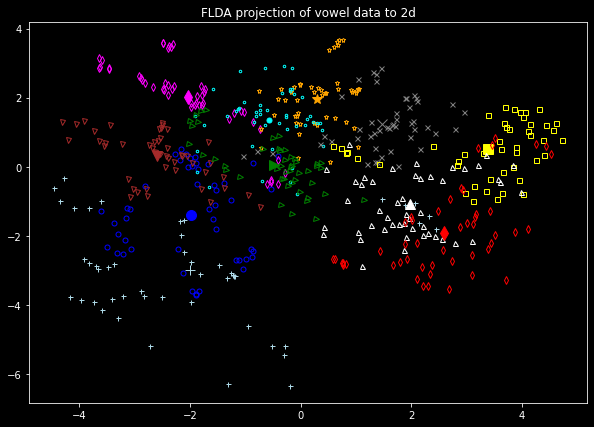

In [6]:
# Fischer LDA projection
# [References]
# 1. The Elements of Statistical Learning 2E, Hastie et al. (2009), Figure 4.4
# 2. Pattern Classification 2E, Duda et al. (2001), 4.10 Fisher Linear Discriminant
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
flda = LinearDiscriminantAnalysis(n_components=K)
X_flda = flda.fit_transform(X, y)
muC2d_flda = flda.transform(muC)

_, ax = plt.subplots(figsize=(10,7))
for c in range(nclasses):
    ndx = np.where(y == (c + 1))
    ax.plot(X_flda[ndx, 0], X_flda[ndx, 1], symbols[c], color=colors[c], markersize=5, fillstyle='none')
    ax.plot(muC2d_flda[c, 0], muC2d_flda[c, 1], symbols[c], color=colors[c], markersize=10)
ax.set_title('FLDA projection of vowel data to 2d');